<a href="https://colab.research.google.com/github/glvaks/CoderHouse---Data-Science-I/blob/main/Entrega_Final_Gabriel_Londynski_Vaks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# CoderHouse - Data Science - Red Wine Quality Data

El dataset "Red Wine Quality" de Cortez et al. (2009), disponible en Kaggle (https://www.kaggle.com/datasets/uciml/red-wine-quality-cortez-et-al-2009/data), es un recurso clave para la investigación en análisis de datos y modelado predictivo en el contexto de la enología.

Este conjunto de datos contiene información fisicoquímica detallada sobre muestras de vino tinto provenientes de la región del Duero, en Portugal, y ha sido diseñado para explorar la relación entre las propiedades químicas del vino y su calidad sensorial.

El dataset incluye 1.599 muestras de vino tinto, cada una caracterizada por 11 atributos fisicoquímicos: acidez fija, acidez volátil, ácido cítrico, azúcares residuales, cloruros, dióxido de azufre libre, dióxido de azufre total, densidad, pH, sulfatos y contenido de alcohol. Además de estos atributos, se proporciona una variable de salida que representa la calidad del vino, evaluada por enólogos en una escala de 0 a 10.( 1-3 malo / 4-6 mediano / 7-10 bueno)

Este conjunto de datos es ampliamente utilizado para construir y evaluar modelos de clasificación y regresión, que intentan predecir la calidad del vino en función de sus características fisicoquímicas. Su estructura bien definida y la calidad de las anotaciones lo convierten en un excelente banco de pruebas para técnicas de machine learning, permitiendo a los investigadores y profesionales del área desarrollar modelos que optimicen la producción y mejoren la calidad del vino.

Por lo tanto, intentaremos con el presente trabajo contestar la siguiente hipótesis:

1) Los valores de acidez volátil, acidez fija y acido citrico del vino son informaciones esenciales para determinar la calidad del vino.

2) Es posible predecir la clasificación del vino con modelos de ML utilizando las características fisicoquímicas

In [25]:
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import  numpy as np
from google.colab import files


In [4]:
df_vinos=pd.read_csv("https://raw.githubusercontent.com/glvaks/CoderHouse---Data-Science-I/main/winequality-red.csv")
df_vinos

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [5]:
df_vinos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [6]:
df_vinos.isnull().sum()

,0
fixed acidity,0
volatile acidity,0
citric acid,0
residual sugar,0
chlorides,0
free sulfur dioxide,0
total sulfur dioxide,0
density,0
pH,0
sulphates,0


Vemos que el dataset no contiene ningun valor NaN, y que todas las columnas son de float64 y/o int64, lo que condice con los datos estudiados

In [7]:
df_vinos.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


El dataset a primera vista no parece contener valores imposibles en ninguna columna. Se ven datos que de manera general son plausibles y correctos

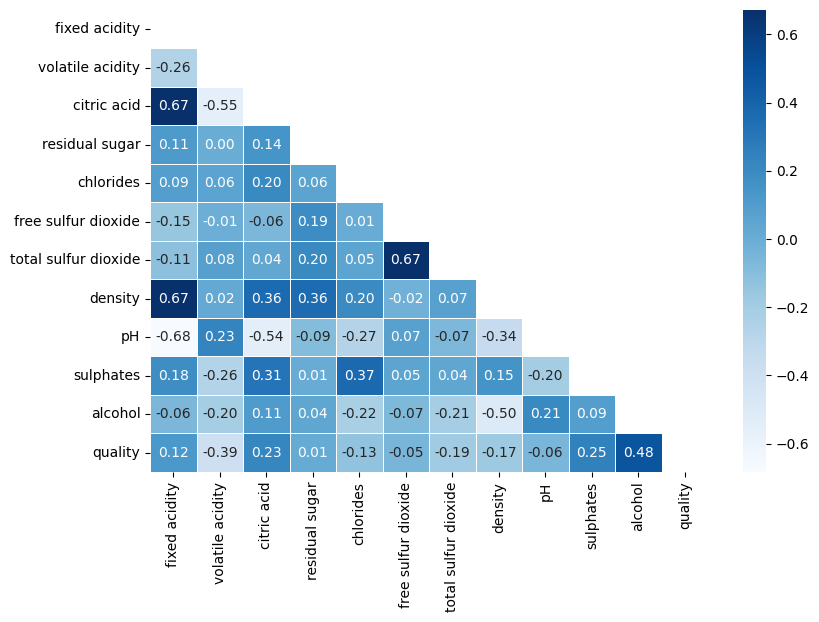

In [8]:
corr= df_vinos.corr()
plt.figure(figsize=(9, 6))
sns.heatmap(corr, annot=True, linewidth=0.5, cmap='Blues', mask=np.triu(corr), fmt='.2f')
plt.show()

Vemos 3 correlaciones fuertes (0.67), entre: la acidez fija con la densidad y acido citrico, y los totales de dioxido sulfurico con los dioxidos sulfuricos libres

Con este heatmap ya podemos tener una idea de las correlaciones entre dos variables distintas y entonces empezar a crear gráficos para investigar los datos y intentar constestar la primera hipotesis planteada


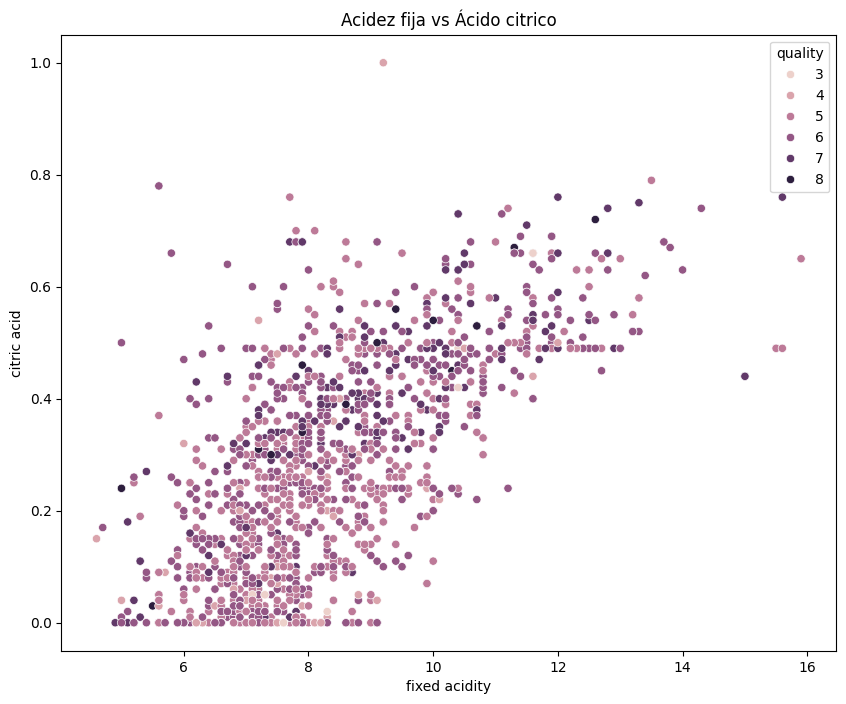

In [9]:
plt.figure(figsize=(10,8))
sns.scatterplot(x='fixed acidity', y='citric acid', hue='quality', data=df_vinos)
plt.title('Acidez fija vs Ácido citrico')
plt.show()



Con este gráfico se puede observar la fuerte correlación positiva entre los niveles de acidez fija y acido citrico.

Los vinos de buena calidad, a decir con puntaje 7 o más, también parecen acompañar la correlacion positiva de las dos variables

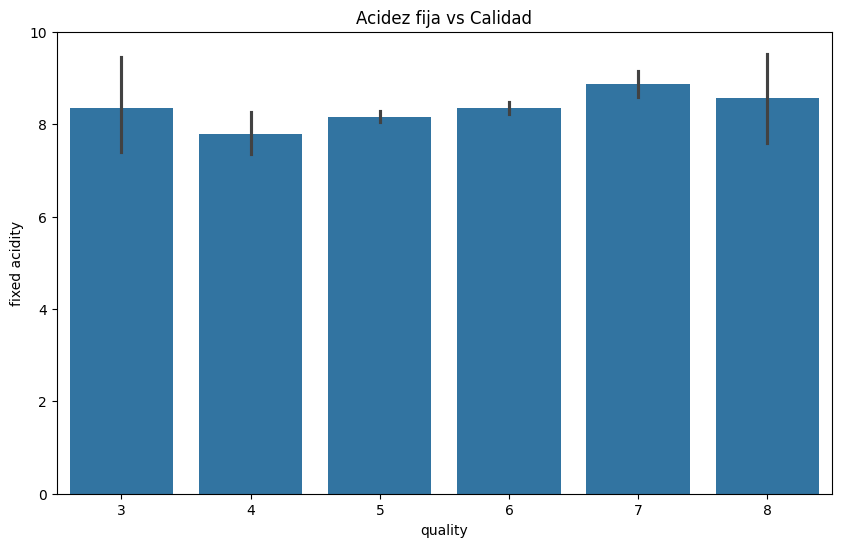

In [10]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'fixed acidity', data = df_vinos)
plt.title('Acidez fija vs Calidad')
plt.show()

No es posible indentificar a través de este barplot si un cambio en la acidez fija influye en la calidad del vino directamente.

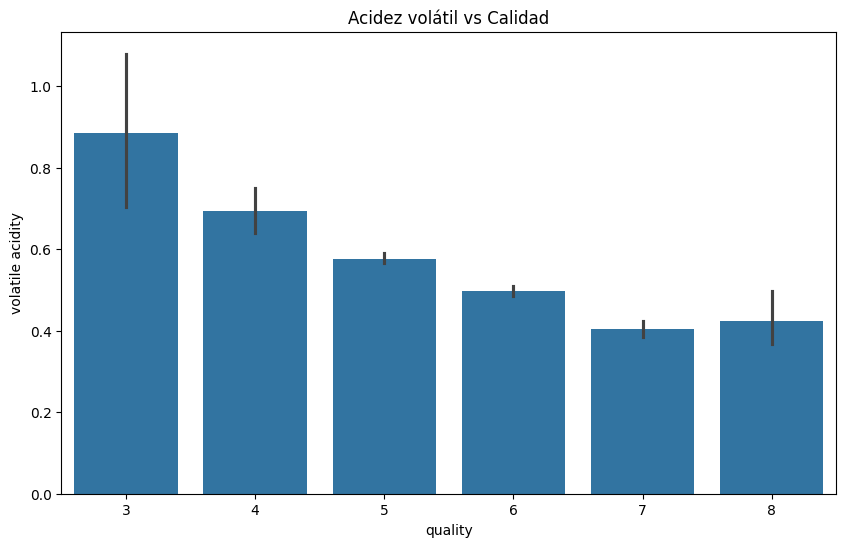

In [11]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'volatile acidity', data = df_vinos)
plt.title('Acidez volátil vs Calidad')
plt.show()

Aqui vemos una clara relación, bastante interesante. Cuanto más alta la acidez volatil, más baja aparenta ser la calidad del vino

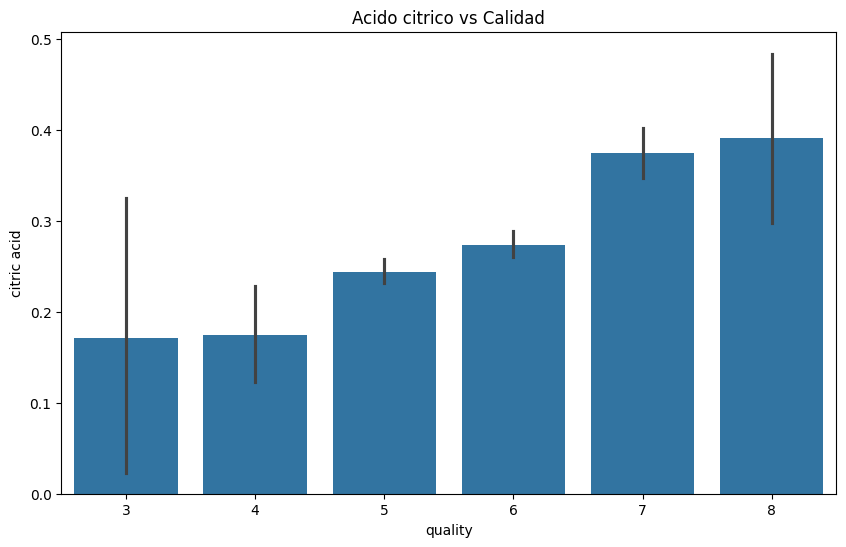

In [12]:
fig = plt.figure(figsize = (10,6))
sns.barplot(x = 'quality', y = 'citric acid', data = df_vinos)
plt.title('Acido citrico vs Calidad')
plt.show()

Aqui vemos una clara relación inversa a la anterior. Cuanto más alto el nivel de acido cítrico, más alta aparenta ser la calidad del vino

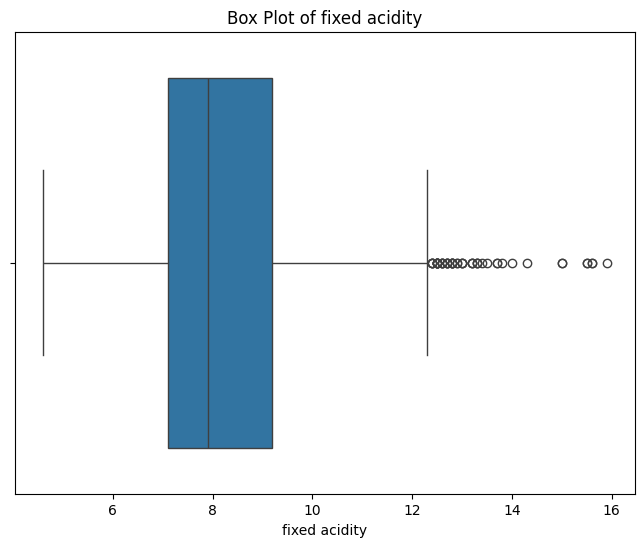

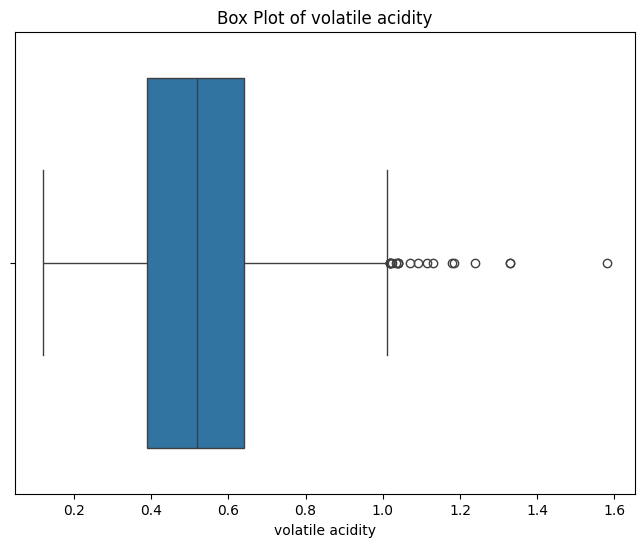

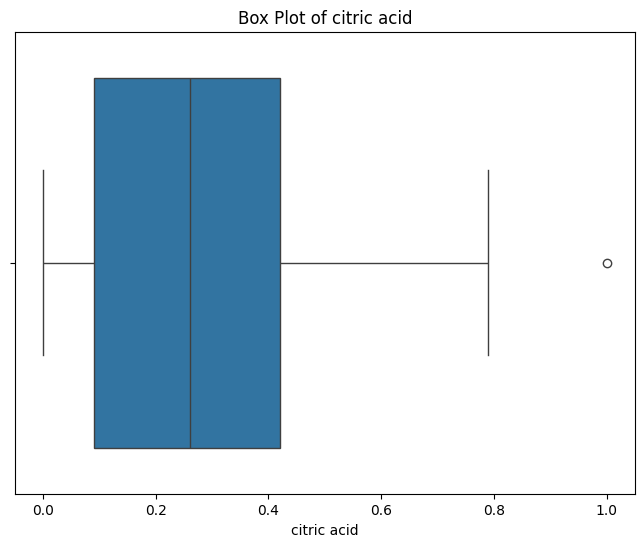

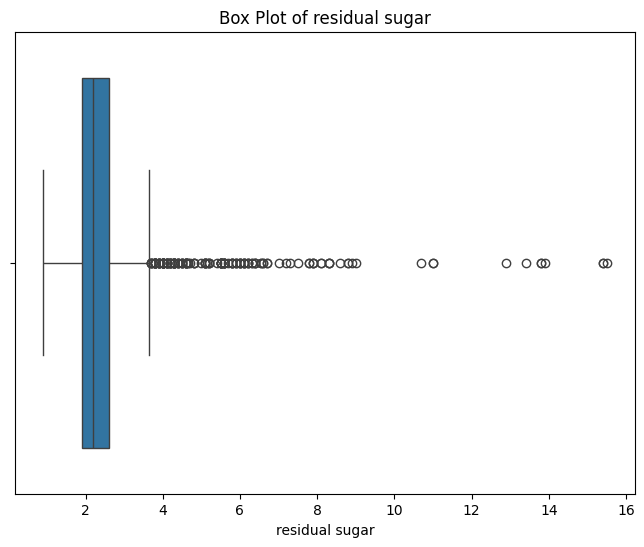

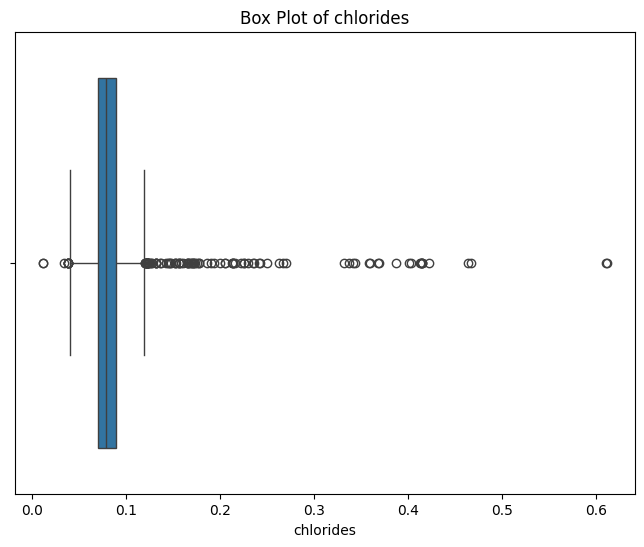

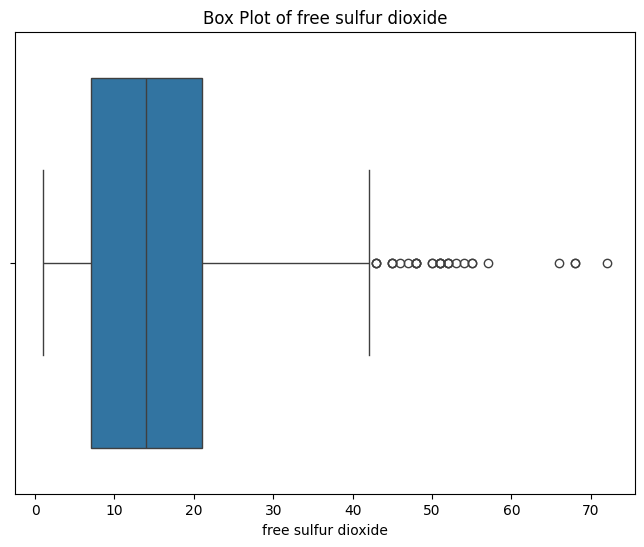

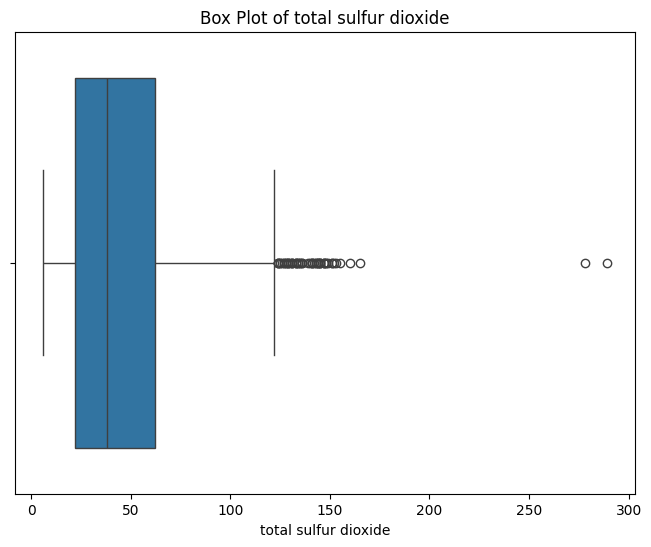

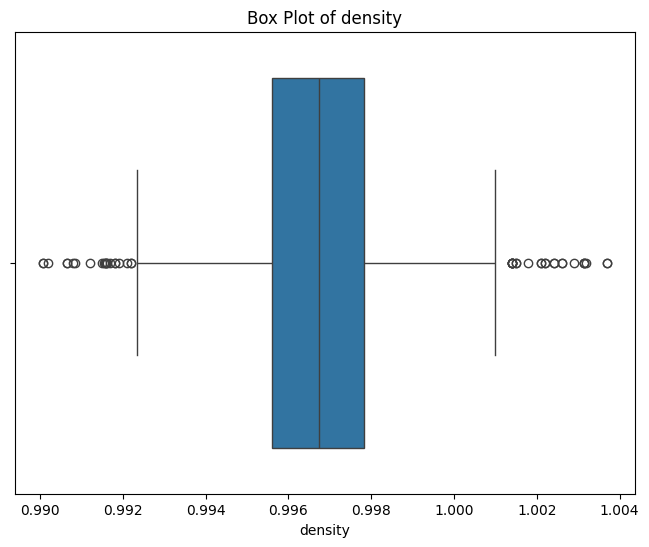

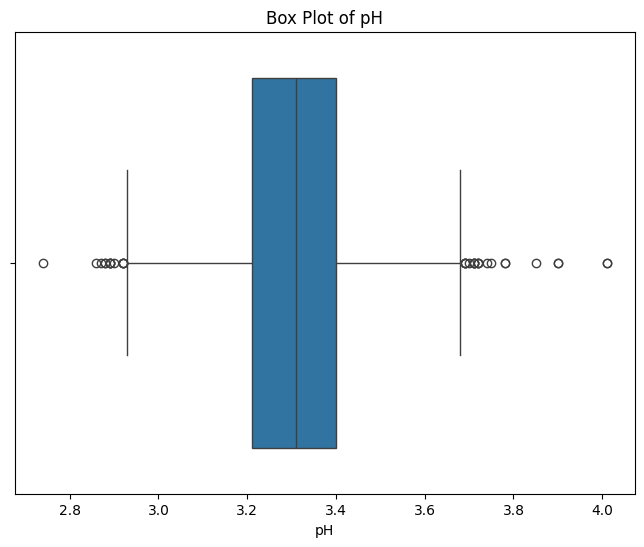

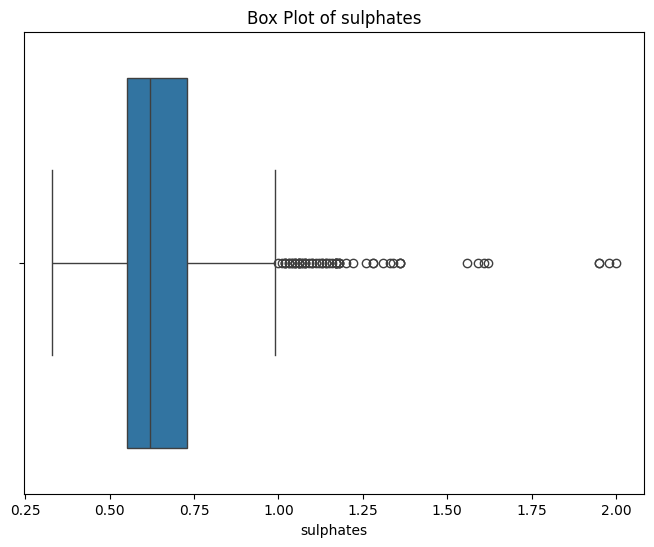

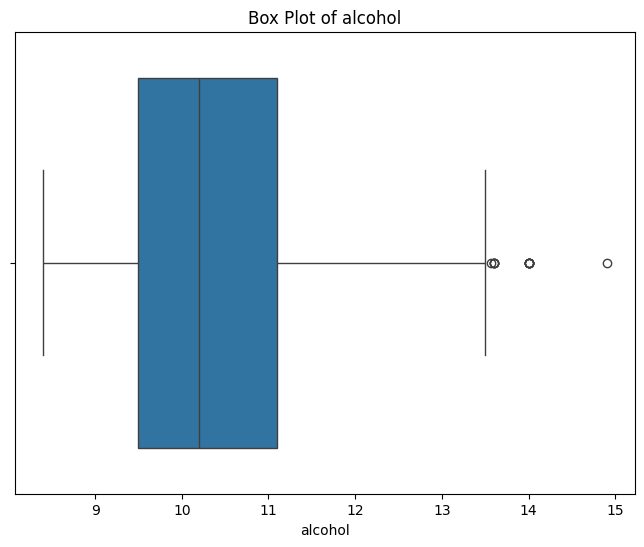

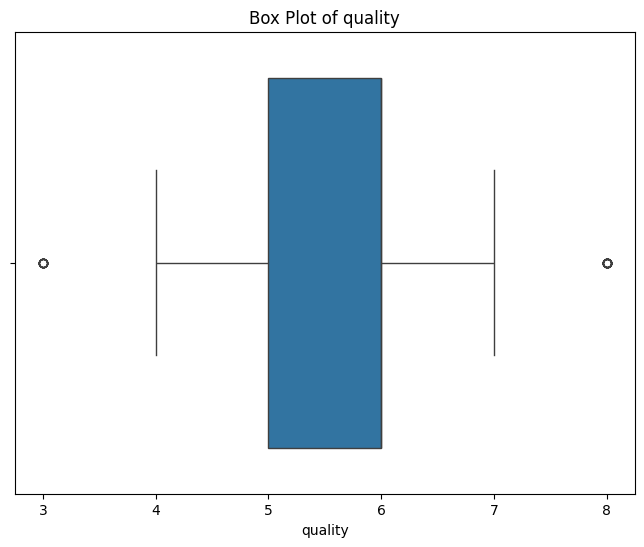

In [13]:
# codigo para crear un boxplot para cada columna
for column in df_vinos.columns:
  plt.figure(figsize=(8, 6))
  sns.boxplot(x=df_vinos[column])
  plt.title(f'Box Plot of {column}')
  plt.show()


Box plots son gráficos extremamente importantes para entender los datos y principalmente identificar outliers. Se pueden ver outliers en este analisis, pero como todos los datos se encuentran dentro del dominio imputado, ningun dato será imputado

In [14]:
df_vinos = df_vinos.replace({'quality' : { 8 : 'Good',
                                    7 : 'Good',
                                    6 : 'Medium',
                                    5 : 'Medium',
                                    4 : 'Bad',
                                    3 : 'Bad',
                                                 }})

In [15]:
df_vinos.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Medium
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Medium
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Medium
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Medium


In [16]:
df_vinos['quality'].value_counts()

,count
quality,
Medium,1319
Good,217
Bad,63


Con esta feature selection simplificamos la categorización de los vinos para mejor utilizar los algoritmos de clasificación y entender la analisis de manera mas directa.

Vemos que en este sentido el dataset tiene la clasificación 'Bad' muy desequilibrada, sumando apenas 4% de los resultados. Esto es una informacion importante, un tema para estudiar en el futuro y traer opciones para optimizar los modelos de predicción.

In [17]:
from sklearn.preprocessing import MinMaxScaler

X_temp = df_vinos.drop(columns='quality')
y = df_vinos.quality
scaler = MinMaxScaler(feature_range=(0, 1)).fit_transform(X_temp)

X = pd.DataFrame(scaler, columns=X_temp.columns)
X.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,0.329171,0.279329,0.270976,0.112247,0.125988,0.209506,0.142996,0.490211,0.449695,0.196496,0.311228
std,0.154079,0.122644,0.194801,0.096570,0.078573,0.147326,0.116238,0.138571,0.121564,0.101501,0.163949
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.221239,0.184932,0.090000,0.068493,0.096828,0.084507,0.056537,0.406021,0.370079,0.131737,0.169231
50%,0.292035,0.273973,0.260000,0.089041,0.111853,0.183099,0.113074,0.490455,0.448819,0.173653,0.276923
75%,0.407080,0.356164,0.420000,0.116438,0.130217,0.281690,0.197880,0.570117,0.519685,0.239521,0.415385
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


MinMaxScaler escala los datos a un rango común ( [0, 1] ), normalizando el dataset para evitar que las características con rangos grandes dominen los modelos predictivos

In [18]:
 from sklearn.neighbors import KNeighborsClassifier
 from sklearn.model_selection import train_test_split
 from sklearn.metrics import confusion_matrix
 from sklearn import metrics

In [19]:
X = pd.DataFrame(scaler, columns=X_temp.columns)
y = df_vinos['quality']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
pred_train = knn.predict(X_train)
pred_test = knn.predict(X_test)


Elegi el modelo de clasificación K-Neighbouring Classifier como primera opción para entrenar los datos en este proyecto

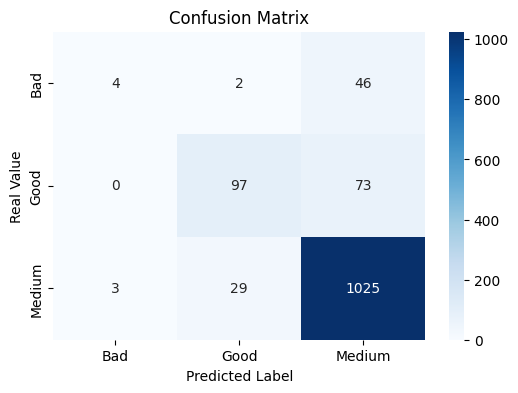


              precision    recall  f1-score   support

         Bad       0.57      0.08      0.14        52
        Good       0.76      0.57      0.65       170
      Medium       0.90      0.97      0.93      1057

    accuracy                           0.88      1279
   macro avg       0.74      0.54      0.57      1279
weighted avg       0.86      0.88      0.86      1279



In [24]:
cm = confusion_matrix(y_train, pred_train)
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",)
ax.xaxis.set_ticklabels(['Bad', 'Good', 'Medium'])
ax.yaxis.set_ticklabels(['Bad', 'Good', 'Medium'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Real Value")
plt.show()
print("")
print(metrics.classification_report(y_train, pred_train))

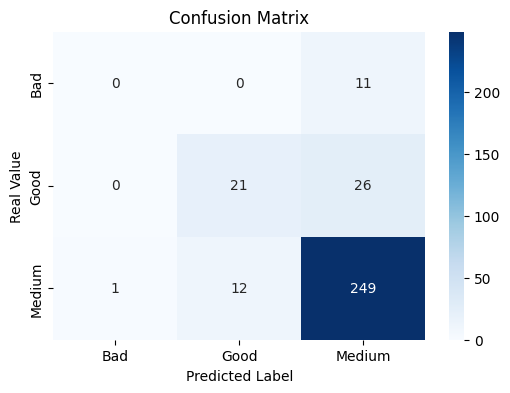


              precision    recall  f1-score   support

         Bad       0.00      0.00      0.00        11
        Good       0.64      0.45      0.52        47
      Medium       0.87      0.95      0.91       262

    accuracy                           0.84       320
   macro avg       0.50      0.47      0.48       320
weighted avg       0.81      0.84      0.82       320



In [23]:
cm = confusion_matrix(y_test, pred_test)
plt.figure(figsize=(6, 4))
ax = sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",)
ax.xaxis.set_ticklabels(['Bad', 'Good', 'Medium'])
ax.yaxis.set_ticklabels(['Bad', 'Good', 'Medium'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("Real Value")
plt.show()
print("")
print(metrics.classification_report(y_test, pred_test))


El modelo alcanzó una exactitud de 88%, un valor significativo que demuestra un modelaje sólido, ya suficiente bueno para reportes y predicciones con un nivel de confianza alto.

Vemos que la exactitud del modelo cayo 4% cuando comparamos los resultados de entrenamiento y test, lo que nos dice que es un modelo que si funciona sin overfitting o underfitting.

Eso quiere decir que nuestra segunda hipótesis es valida, y aparentemente si es posible predecir la clasificación del vino con modelos de ML de clasificación utilizando sus características fisicoquímicas.

Cuando separamos las métricas en categorías, vemos que "Bad" y "Good" tuvieron resultados expresamente peores comparados a "Medium". Una posible causa puede ser el hecho de que el dataset en este sentido es muy desequilibrado, con solamente 4% del total de los datos "bad" y 16% de "Medium". Probablemente su entrenamiento no fue extenso suficientes para que el algoritmo aprenda.

En un futuro podríamos buscar maneras de optimizar los resultados, enfocando principalmente en las categorías "Good" y "Bad". Quizás otros algoritmos puedan utilizar los pocos datos de manera más eficiente y mejorar aún más la exactitud de los resultados. Otras opciones de mejora podrían ser cambiar el test size y/o el valor de n_neighbours